In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#load dataset
athletes = pd.read_csv('athlete_events.csv')
region = pd.read_csv('noc_regions.csv')

In [3]:
athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
region.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [5]:
#Join the dataframes
athletes_df = athletes.merge(region, how = 'left', on='NOC')
athletes_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [6]:
athletes_df.shape

(271116, 17)

In [7]:
#column names consistent

athletes_df.rename(columns={'region':'Region', 'notes': 'Notes'}, inplace=True);

In [8]:
athletes_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [9]:
athletes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  Region  270746 non-null  object 
 16  Notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


In [10]:
athletes_df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [11]:
#check for null values

null_values = athletes_df.isna()
nan_columns = null_values.any()
nan_columns

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal      True
Region     True
Notes      True
dtype: bool

In [12]:
#Sum of Null values
athletes_df.isna().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
Region       370
Notes     266077
dtype: int64

Having Null values in medals column might be a result of an athlete not winning anything in the competition 

In [13]:
# printing the column names that contains the null values in form of a list

columns_with_nan = athletes_df.columns[nan_columns].tolist()
print(columns_with_nan)

['Age', 'Height', 'Weight', 'Medal', 'Region', 'Notes']


<h2>Data for specific athletes</h2>

In [14]:
#India details

athletes_df.query('Team == "India"').head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
505,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 110 metres Hurdles,NaN,India,NaN
506,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 400 metres Hurdles,NaN,India,NaN
895,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 800 metres,NaN,India,NaN
896,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 4 x 400 metres Relay,NaN,India,NaN
897,512,Shiny Kurisingal Abraham-Wilson,F,23.0,167.0,53.0,India,IND,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Women's 800 metres,NaN,India,NaN


In [15]:
#Japan details

athletes_df.query('Team == "Japan"').head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
625,362,Isao Ko Abe,M,24.0,177.0,75.0,Japan,JPN,1936 Summer,1936,Summer,Berlin,Athletics,Athletics Men's Hammer Throw,NaN,Japan,NaN
629,363,Kazumi Abe,M,28.0,178.0,67.0,Japan,JPN,1976 Winter,1976,Winter,Innsbruck,Bobsleigh,Bobsleigh Men's Four,NaN,Japan,NaN
630,364,Kazuo Abe,M,25.0,166.0,69.0,Japan,JPN,1960 Summer,1960,Summer,Roma,Wrestling,"Wrestling Men's Lightweight, Freestyle",NaN,Japan,NaN
631,365,Kinya Abe,M,23.0,168.0,68.0,Japan,JPN,1992 Summer,1992,Summer,Barcelona,Fencing,"Fencing Men's Foil, Individual",NaN,Japan,NaN
632,366,Kiyoshi Abe,M,25.0,167.0,62.0,Japan,JPN,1972 Summer,1972,Summer,Munich,Wrestling,"Wrestling Men's Featherweight, Freestyle",NaN,Japan,NaN


In [16]:
#Top countries  participating 

top_10_countries = athletes_df.Team.value_counts().sort_values(ascending=False).head(15)
top_10_countries

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Poland            6143
Switzerland       5844
Netherlands       5718
Soviet Union      5535
Finland           5379
Name: Team, dtype: int64

<h4>USA have the most participant in the Olympics </h4>

<AxesSubplot:title={'center':'Overall Participation by Country'}, ylabel='Team'>

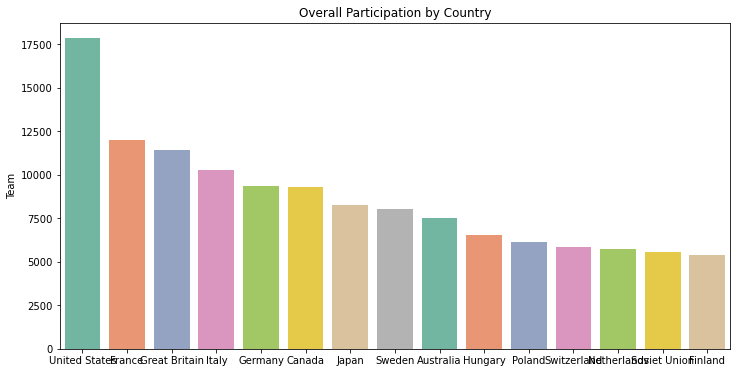

In [17]:
#Plot for the top 10 countries 

plt.figure(figsize=(12,6))
#plt.xticks(rotation=20)
plt.title('Overall Participation by Country')
sns.barplot(x=top_10_countries.index, y=top_10_countries, palette = 'Set2')

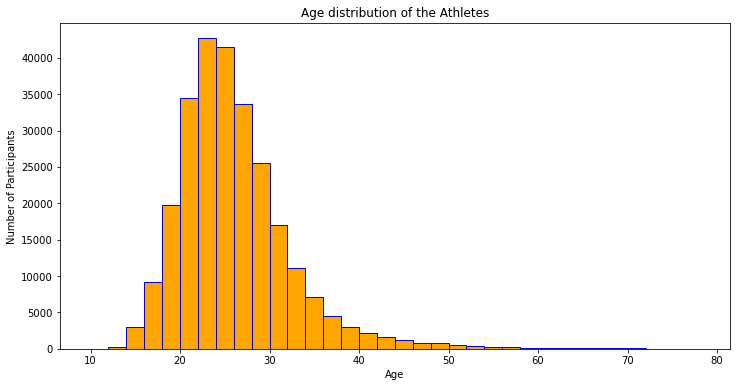

In [18]:
#Age distribution of the Participants 

plt.figure(figsize=(12,6))
plt.title('Age distribution of the Athletes')
plt.xlabel('Age')
plt.ylabel('Number of Participants')
plt.hist(athletes_df.Age, bins = np.arange(10,80,2), color='orange', edgecolor = 'blue');

Most number of athlete are between 20 to 30, we also have athletes above 40 and also athlete under 18years old

In [19]:
#Winter olympics games 
winter_sports = athletes_df[athletes_df.Season == 'Winter'].Sport.unique()
winter_sports

array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

In [20]:
#Summer olympics games 
Summer_sports = athletes_df[athletes_df.Season == 'Summer'].Sport.unique()
Summer_sports

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [21]:
#Male and female Participant
gender_counts = athletes_df.Sex.value_counts()

gender_counts

M    196594
F     74522
Name: Sex, dtype: int64

since inception of the olympics we have had more male participant than female participant

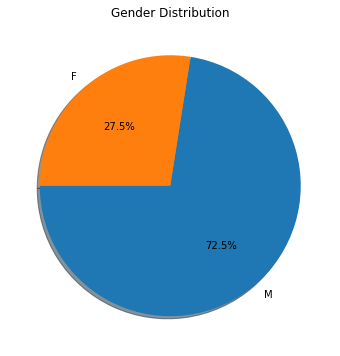

In [22]:
#pie plot for male and female athletes

plt.figure(figsize=(12,6))
plt.title('Gender Distribution')
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=180, shadow=True);

In [23]:
# Total medals
athletes_df.Medal.value_counts()

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

In [24]:
#Total number of female athlete in each olympics 

female_participants = athletes_df[(athletes_df.Sex == 'F') & (athletes_df.Season == 'Summer')][['Sex', "Year"]]

female_participants = female_participants.groupby('Year').count().reset_index()
female_participants.head()

,Year,Sex
0,1900,33
1,1904,16
2,1906,11
3,1908,47
4,1912,87


In [25]:
womenOlympics = athletes_df[(athletes_df.Sex == 'F') & (athletes_df.Season == 'Summer')][['Sex', "Year"]]

Text(0.5, 1.0, 'Women participation')

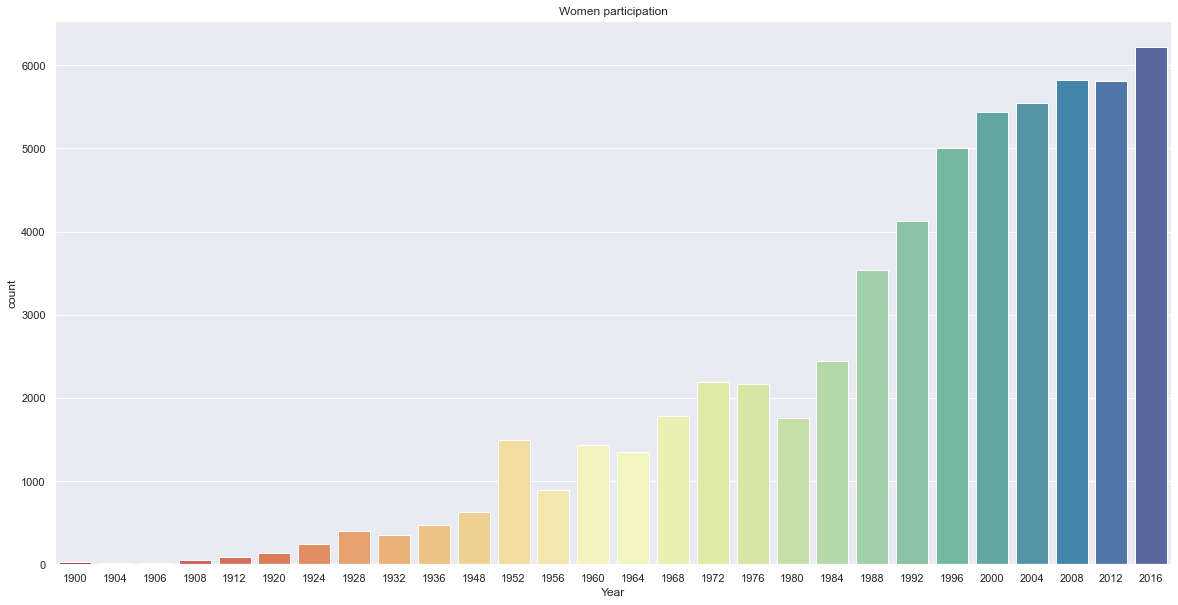

In [26]:
sns.set(style="darkgrid")
plt.figure(figsize=(20,10))
sns.countplot(x='Year', data=womenOlympics, palette="Spectral")
plt.title('Women participation')

Text(0.5, 1.0, 'Plot of Female Athletes over time')

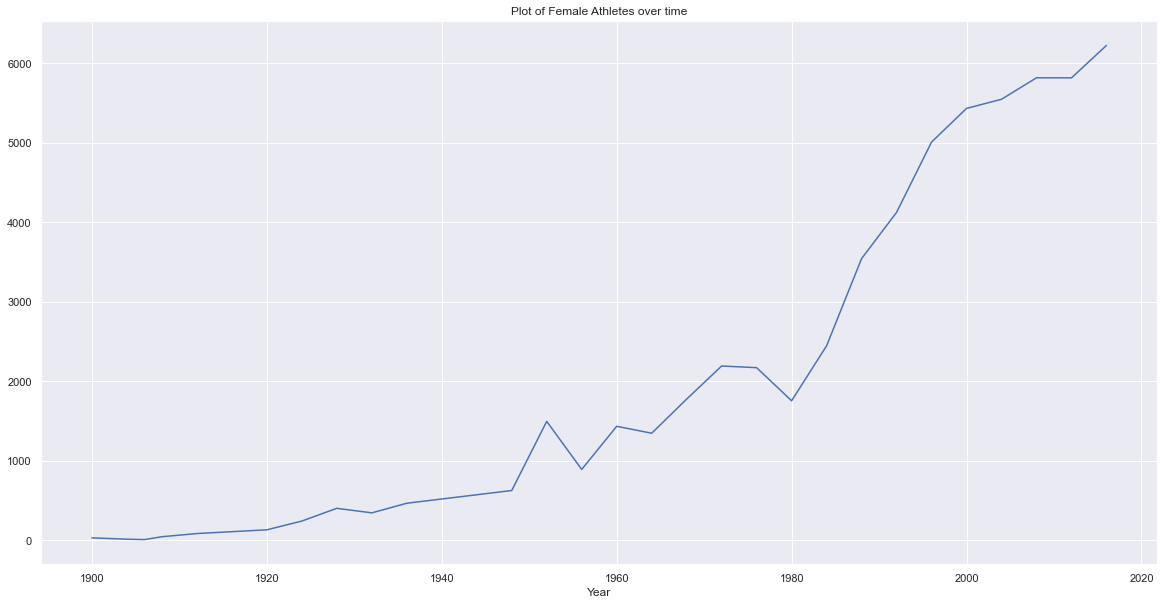

In [27]:
part = womenOlympics.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20, 10))
part.loc[:,'F'].plot()
plt.title('Plot of Female Athletes over time')

women participation in olympics have increased over time, there was a slight decrease aroudn 1950 and 1980s but since then it has always increase. 

In [28]:
#Gold medal athletes

gold_medal = athletes_df[(athletes_df.Medal == 'Gold')]
gold_medal.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN


In [29]:
# take only the values that are different from NaN

gold_medal = gold_medal[np.isfinite(gold_medal['Age'])]

In [30]:
#Athlete with Gold medal older than  60

gold_medal['ID'][gold_medal['Age'] > 60].count()

6

In [31]:
sporting_event = gold_medal['Sport'][gold_medal['Age']>60]

sporting_event

104003    Art Competitions
105199               Roque
190952             Archery
226374             Archery
233390            Shooting
261102             Archery
Name: Sport, dtype: object

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Gold Medals for Athletes over 60 years')

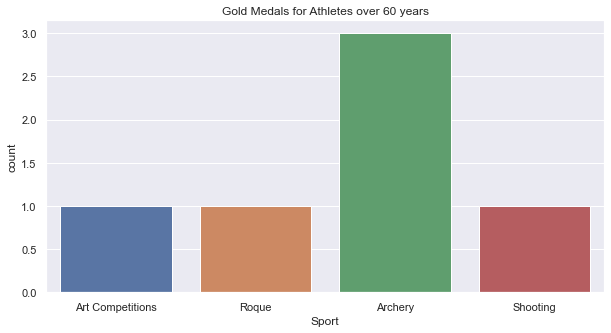

In [32]:
#Plot for sporting_event

plt.figure(figsize=(10,5))
plt.tight_layout()
sns.countplot(sporting_event)
plt.title('Gold Medals for Athletes over 60 years')

In [33]:
#Country and their total number of Gold 

gold_medal.Region.value_counts().reset_index(name='Medal').head()

,index,Medal
0,USA,2627
1,Russia,1599
2,Germany,1293
3,UK,657
4,Italy,567


Text(0.5, 1.0, 'Gold Medals per Country')

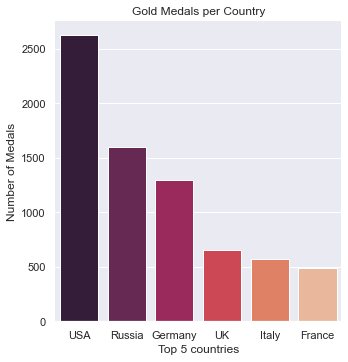

In [34]:
totalGoldMedals = gold_medal.Region.value_counts().reset_index(name='Medal').head(6)
g = sns.catplot(x='index', y='Medal', data=totalGoldMedals, height=5, kind='bar', palette="rocket")
g.despine(left=True)
g.set_xlabels("Top 5 countries")
g.set_ylabels("Number of Medals")
plt.title('Gold Medals per Country')

In [35]:
#Anaylysis for the most recent olympics which is the rio olympics 
max_year = athletes_df.Year.max()


print(max_year)

team_names = athletes_df[(athletes_df.Year == max_year) & (athletes_df.Medal == 'Gold')].Team

team_names.value_counts().head(10)

2016


United States    137
Great Britain     64
Russia            50
Germany           47
China             44
Brazil            34
Australia         23
Argentina         21
France            20
Japan             17
Name: Team, dtype: int64

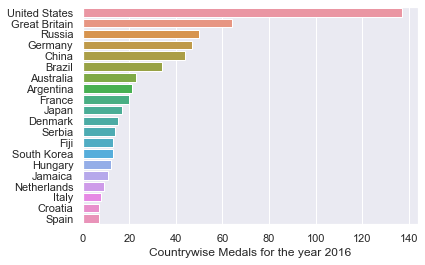

In [36]:
sns.barplot(x=team_names.value_counts().head(20), y=team_names.value_counts().head(20).index)

plt.ylabel(None);
plt.xlabel('Countrywise Medals for the year 2016');

In [37]:
#scatterplot to visualize the height of male and female athlete who have medals 

#filtering the datas to athlete who have won medals 

not_null_medals = athletes_df[(athletes_df['Height'].notnull()) & (athletes_df['Weight'].notnull())]

Text(0.5, 1.0, 'Height vs Weight of Olympic Medalists')

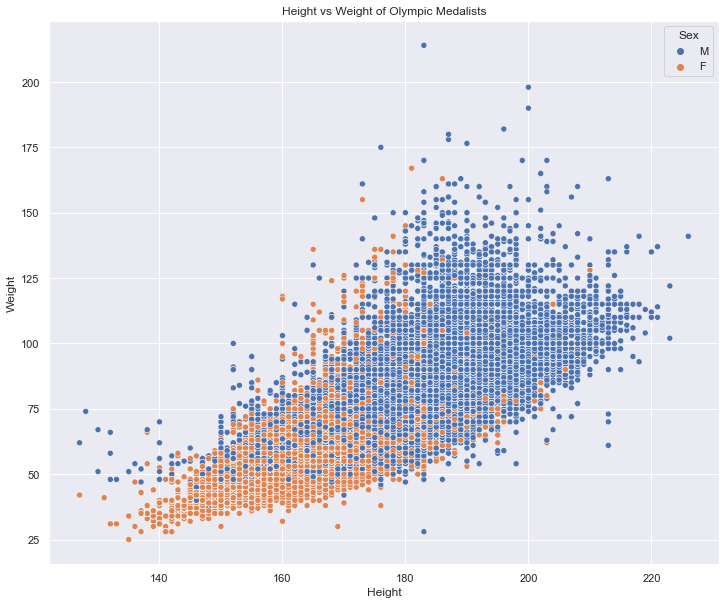

In [38]:
plt.figure(figsize=(12,10))

axis = sns.scatterplot(x = "Height", y = "Weight", data=not_null_medals, hue="Sex")
plt.title("Height vs Weight of Olympic Medalists")

In [39]:
team_n = athletes_df[(athletes_df.Medal == 'Gold')].Team

team_n.value_counts().head(10)

United States    2474
Soviet Union     1058
Germany           679
Italy             535
Great Britain     519
France            455
Sweden            451
Hungary           432
Canada            422
East Germany      369
Name: Team, dtype: int64

In [40]:
team_s = athletes_df[(athletes_df.Medal == 'Silver')].Team

team_s.value_counts().head(10)

United States    1512
Soviet Union      716
Germany           627
Great Britain     582
France            518
Italy             508
Sweden            476
Australia         453
Canada            413
Russia            351
Name: Team, dtype: int64

In [41]:
team_b = athletes_df[(athletes_df.Medal == 'Bronze')].Team

team_b.value_counts().head(10)

United States    1233
Germany           678
Soviet Union      677
France            577
Great Britain     572
Australia         511
Sweden            507
Italy             484
Finland           415
Canada            408
Name: Team, dtype: int64

In [42]:
team_s = athletes_df[(athletes_df.Medal == 'Silver')].Team

team_s.value_counts().head(10)

United States    1512
Soviet Union      716
Germany           627
Great Britain     582
France            518
Italy             508
Sweden            476
Australia         453
Canada            413
Russia            351
Name: Team, dtype: int64

In [43]:
athletes_df.Age.value_counts()

23.0    21875
24.0    21720
22.0    20814
25.0    19707
21.0    19164
        ...  
77.0        2
84.0        1
10.0        1
96.0        1
97.0        1
Name: Age, Length: 74, dtype: int64

In [44]:
athletes_df.Height.value_counts()

180.0    12492
170.0    11976
178.0    10708
175.0    10320
183.0     8284
         ...  
226.0        3
131.0        2
130.0        2
219.0        2
128.0        1
Name: Height, Length: 95, dtype: int64

In [45]:
Gold_age_height = gold_medal.groupby('Age')['Height'].value_counts()

Gold_age_height.head(30)

Age   Height
13.0  160.0     2
      142.0     1
      165.0     1
      168.0     1
14.0  175.0     5
      162.0     3
      167.0     3
      150.0     2
      136.0     1
      139.0     1
      159.0     1
      160.0     1
      172.0     1
      173.0     1
      174.0     1
15.0  171.0     7
      178.0     7
      157.0     3
      160.0     3
      162.0     3
      165.0     3
      170.0     3
      173.0     3
      175.0     3
      150.0     2
      166.0     2
      174.0     2
      179.0     2
      187.0     2
      136.0     1
Name: Height, dtype: int64

In [46]:
Gold = athletes_df[(athletes_df.Medal == 'Gold') & (athletes_df.Age)][['Age', "Medal"]]

Gold.value_counts()

Age   Medal
23.0  Gold     1136
24.0  Gold     1135
22.0  Gold     1096
25.0  Gold     1056
26.0  Gold      976
21.0  Gold      925
27.0  Gold      863
28.0  Gold      802
20.0  Gold      674
29.0  Gold      649
30.0  Gold      527
19.0  Gold      459
31.0  Gold      401
32.0  Gold      357
33.0  Gold      292
18.0  Gold      280
34.0  Gold      218
17.0  Gold      199
35.0  Gold      176
36.0  Gold      133
16.0  Gold      116
38.0  Gold       89
37.0  Gold       81
15.0  Gold       75
40.0  Gold       74
39.0  Gold       65
41.0  Gold       43
42.0  Gold       42
44.0  Gold       38
43.0  Gold       32
14.0  Gold       27
46.0  Gold       24
47.0  Gold       24
48.0  Gold       21
45.0  Gold       20
49.0  Gold       15
54.0  Gold       15
50.0  Gold       12
52.0  Gold       12
56.0  Gold       10
13.0  Gold        7
53.0  Gold        6
51.0  Gold        4
60.0  Gold        4
63.0  Gold        4
58.0  Gold        3
57.0  Gold        2
59.0  Gold        2
64.0  Gold        2
55.0  Go

Text(0.5, 1.0, 'Age of Athlete that got Gold')

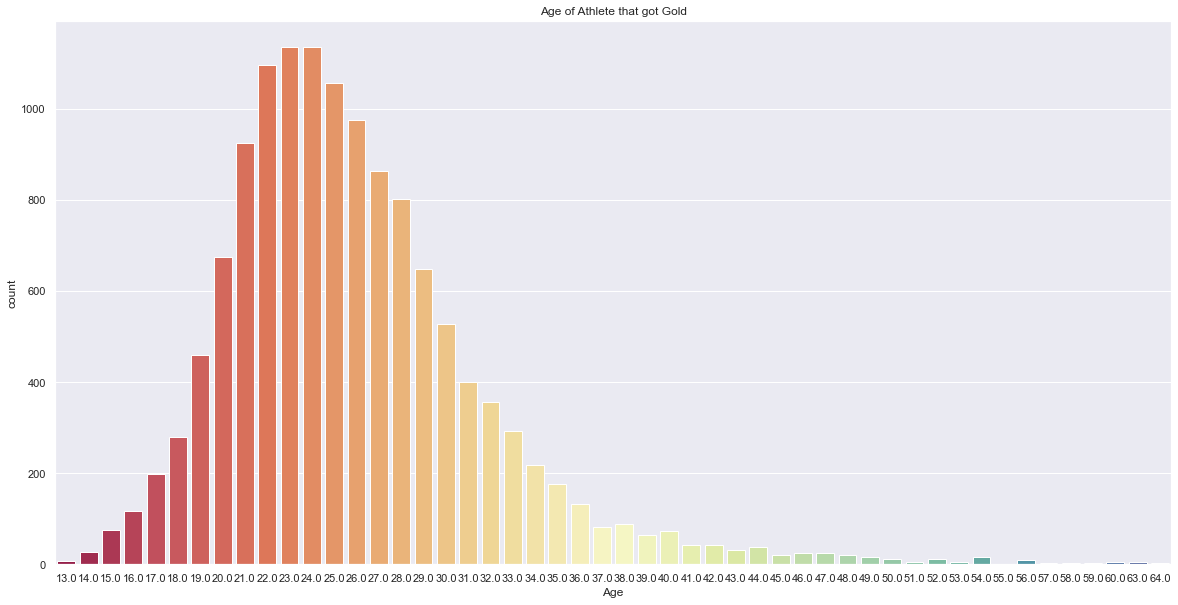

In [47]:
sns.set(style="darkgrid")
plt.figure(figsize=(20,10))
sns.countplot(x='Age', data=Gold, palette="Spectral")
plt.title('Age of Athlete that got Gold')

<h4>The Athlete from age 14 to 35 got lot of golds while our data also shows that Athlete of age 23 got me most golds </h4>

In [48]:
Gold_Age_height = athletes_df[(athletes_df.Medal == 'Gold') & (athletes_df.Age)][['Age', "Medal", 'Height']]

Gold_Age_height.value_counts().head(20)

Age   Medal  Height
22.0  Gold   180.0     64
             183.0     60
24.0  Gold   183.0     56
23.0  Gold   180.0     53
             183.0     53
22.0  Gold   185.0     51
28.0  Gold   180.0     51
25.0  Gold   178.0     50
23.0  Gold   178.0     50
25.0  Gold   180.0     50
26.0  Gold   185.0     47
             178.0     47
24.0  Gold   180.0     46
22.0  Gold   175.0     46
23.0  Gold   185.0     46
25.0  Gold   170.0     46
24.0  Gold   175.0     45
22.0  Gold   178.0     45
25.0  Gold   183.0     45
21.0  Gold   180.0     45
dtype: int64

we can determine the poistions of the players based on thier heights using a boxplots

In [51]:
sports_hall = ['Volleyball','Basketball']
basket_volley = athletes_df[(athletes_df['Year'] == 2016) & athletes_df['Sport'].isin(sports_hall)]

it is important to see the relationship between the heights and weights of the athletes

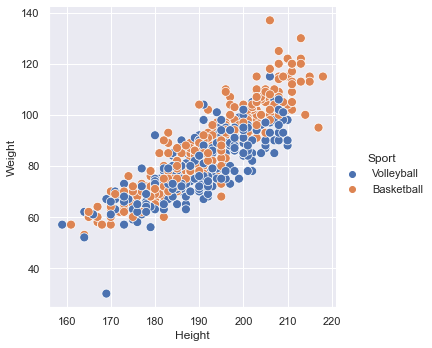

In [54]:
sns.relplot(x='Height', y ='Weight', hue="Sport", data=basket_volley, s=80)

In [57]:
basketball = basket_volley.query("Sport == 'Basketball'")
basketball.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
1029,576,"Alejandro ""lex"" Abrines Redondo",M,23.0,198.0,93.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Basketball,Basketball Men's Basketball,Bronze,Spain,NaN
1215,683,Natalie Chioma Achonwa,F,23.0,190.0,86.0,Canada,CAN,2016 Summer,2016,Summer,Rio de Janeiro,Basketball,Basketball Women's Basketball,NaN,Canada,NaN
1322,742,Roberto Acua,M,25.0,208.0,109.0,Argentina,ARG,2016 Summer,2016,Summer,Rio de Janeiro,Basketball,Basketball Men's Basketball,NaN,Argentina,NaN
1867,1023,"Adriana ""Adrianinha"" Moiss Pinto",F,37.0,170.0,65.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Basketball,Basketball Women's Basketball,NaN,Brazil,NaN
3049,1701,"Joshua Emmanuel ""Josh"" Akognon",M,30.0,189.0,83.0,Nigeria,NGR,2016 Summer,2016,Summer,Rio de Janeiro,Basketball,Basketball Men's Basketball,NaN,Nigeria,NaN


[Text(0, 0, 'Spain'),
 Text(1, 0, 'Canada'),
 Text(2, 0, 'Argentina'),
 Text(3, 0, 'Brazil'),
 Text(4, 0, 'Nigeria'),
 Text(5, 0, 'Turkey'),
 Text(6, 0, 'France'),
 Text(7, 0, 'Australia'),
 Text(8, 0, 'United States'),
 Text(9, 0, 'Croatia'),
 Text(10, 0, 'Serbia'),
 Text(11, 0, 'China'),
 Text(12, 0, 'Venezuela'),
 Text(13, 0, 'Senegal'),
 Text(14, 0, 'Lithuania'),
 Text(15, 0, 'Belarus'),
 Text(16, 0, 'Japan')]

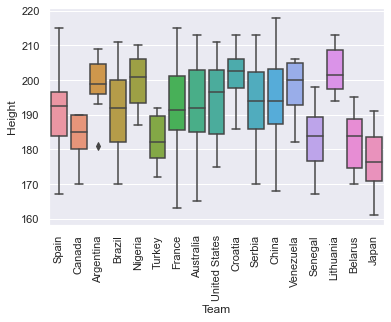

In [58]:
ax = sns.boxplot(x='Team', y='Height', data=basketball)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

The tallest player is the chinese national team player and he's about 218cm . 

In [59]:
Gold_Age_height_Team = athletes_df[(athletes_df.Medal == 'Gold') & (athletes_df.Age)][['Age', "Medal", 'Height', 'Team']]

Gold_Age_height_Team.value_counts().head(40)

Age   Medal  Height  Team         
22.0  Gold   183.0   United States    32
23.0  Gold   188.0   United States    31
             183.0   United States    26
21.0  Gold   183.0   United States    22
22.0  Gold   180.0   United States    21
21.0  Gold   191.0   United States    20
20.0  Gold   188.0   United States    20
24.0  Gold   183.0   United States    18
23.0  Gold   185.0   United States    18
26.0  Gold   185.0   United States    17
22.0  Gold   185.0   United States    17
21.0  Gold   180.0   United States    17
27.0  Gold   188.0   United States    15
22.0  Gold   188.0   United States    15
             178.0   United States    14
23.0  Gold   193.0   United States    14
20.0  Gold   178.0   United States    14
             180.0   United States    13
             183.0   United States    13
23.0  Gold   178.0   United States    13
19.0  Gold   183.0   United States    13
25.0  Gold   178.0   United States    13
23.0  Gold   190.0   United States    13
25.0  Gold   183.0   U

In [60]:
Gold_Age_height_Team = athletes_df[(athletes_df.Medal == "Gold") & (athletes_df.Age)][['Age','Team', 'Medal']]

Gold_Age_height_Team.value_counts().head(30)

Age   Team           Medal
22.0  United States  Gold     263
23.0  United States  Gold     257
21.0  United States  Gold     248
24.0  United States  Gold     190
20.0  United States  Gold     179
25.0  United States  Gold     172
19.0  United States  Gold     152
26.0  United States  Gold     143
27.0  United States  Gold     138
24.0  Soviet Union   Gold     104
27.0  Soviet Union   Gold     102
28.0  United States  Gold      99
25.0  Soviet Union   Gold      97
23.0  Soviet Union   Gold      95
26.0  Soviet Union   Gold      85
18.0  United States  Gold      85
21.0  Soviet Union   Gold      81
29.0  United States  Gold      76
25.0  Germany        Gold      76
22.0  Soviet Union   Gold      73
24.0  Germany        Gold      68
17.0  United States  Gold      68
28.0  Soviet Union   Gold      67
30.0  United States  Gold      64
26.0  Germany        Gold      64
23.0  Germany        Gold      61
29.0  Soviet Union   Gold      60
30.0  Soviet Union   Gold      57
20.0  Soviet Union   

In [61]:
Gold_Age_height_Team_d = athletes_df.groupby(['Age','Team']).size().reset_index().pivot(columns='Age', index = 'Team', values=0).reset_index()

Gold_Age_height_Team_d.head()

Age,Team,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,...,74.0,75.0,76.0,77.0,80.0,81.0,84.0,88.0,96.0,97.0
0,30. Februar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A North American Team,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Acipactli,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Acturus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h4>Finding out the cities that have hosted games by grouping by the cities based on unique year values and later sort the data based on number of occurence of each cities which hosted.</h4>

In [62]:
City = athletes_df.groupby('City').apply(lambda x:x['Year'].unique()).to_frame().reset_index()
City.columns=['City','Years']
City['Occurence'] = [len(c) for c in City['Years']]
City.sort_values('Occurence', ascending=False)

,City,Years,Occurence
3,Athina,"[2004, 1906, 1896]",3
17,London,"[2012, 1948, 1908]",3
30,Sankt Moritz,"[1928, 1948]",2
26,Paris,"[1900, 1924]",2
37,Stockholm,"[1912, 1956]",2
18,Los Angeles,"[1932, 1984]",2
15,Lake Placid,"[1980, 1932]",2
14,Innsbruck,"[1964, 1976]",2
0,Albertville,[1992],1
27,Rio de Janeiro,[2016],1


In [63]:
#Finding out participation of men and women at the olympic games

print('Total number of athletes in Olympics:', len(athletes_df.ID.unique()))
print('Number of Female participants is 120 years:', len(athletes_df[athletes_df.Sex=='F']))
print('Number of Male participants is 120 years:', len(athletes_df[athletes_df.Sex=='M']))

Total number of athletes in Olympics: 135571
Number of Female participants is 120 years: 74522
Number of Male participants is 120 years: 196594
